# UCDP dataset exploratory analysis

In this notebook we look at the relevant variables in the UCDP dataset, that is, the variables we decided to keep during our parsing of the dataset.

In a first step we will look at the general distribution of the different variables. Then we try to find if there exists some relation between any of the variable.

The variables are the following:
* Year
* Type
* Country
* Date start
* Date end
* Casualties

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import numpy as np

%matplotlib inline

In [11]:
parsed_ucdp_dataset = '../data/parsed/parsed_ucdp.csv'

### Read dataset

We will read the dataset and filter the rows based on the year to keep only the conflicts that we will use - the ones that take place from year 2015 onwards.

In [14]:
ucdp_df = pd.read_csv(parsed_ucdp_dataset, index_col='id', encoding='utf-8', compression='gzip')

# Keep only conflicts from 2015 onwards
ucdp_df = ucdp_df[ucdp_df['Year'] > 2014]

# Display a sample of the dataframe
ucdp_df.head()

,Year,Type,Conflict Name,Country,Date Start,Date End,Casualties
id,,,,,,,
151765,2015,1,Burundi:Government,Burundi,2015-01-01,2015-01-01,10
152532,2015,1,Philippines:Mindanao,Philippines,2015-01-02,2015-01-02,1
152533,2015,1,Philippines:Mindanao,Philippines,2015-01-02,2015-01-02,1
155067,2015,1,Afghanistan:Government,Afghanistan,2015-01-01,2015-01-01,1
155118,2015,1,Afghanistan:Government,Afghanistan,2015-01-02,2015-01-02,1


### First analysis

Now we look at a summary of the nummerical variables:

In [88]:
ucdp_df.describe()

,Year,Type,Casualties
count,13970.000000,13970.000000,13970.000000
mean,2015.468289,1.390981,7.611883
std,0.499011,0.738404,23.134162
min,2015.000000,1.000000,0.000000
25%,2015.000000,1.000000,1.000000
50%,2015.000000,1.000000,3.000000
75%,2016.000000,1.000000,7.000000
max,2016.000000,3.000000,1576.000000


From the previous summary we should ignore the mean and stardard deviation of the `Type` variable, since it is actually a categorical variable. However we can observe from the quartiles that most of the conflicts are type 1 (*State-based violence*).

We can also see that the number of casualties for the first quantile is 0 or 1, suggesting that there are many conflicts with this number of casualties.

Next, we can look at the conflicts with the highest casualties.

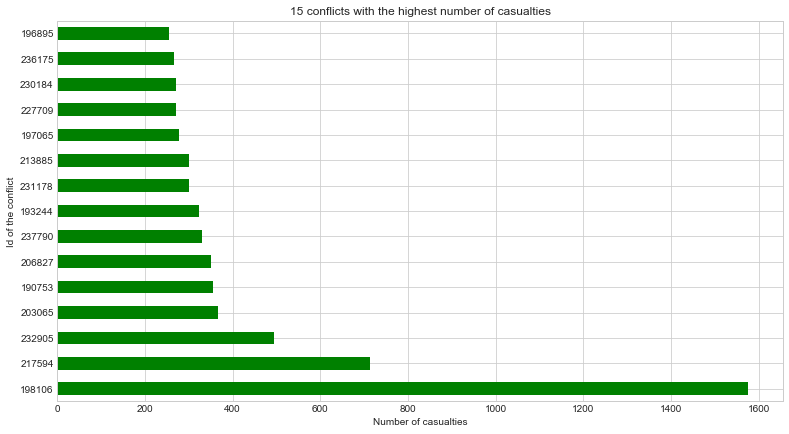

In [123]:
# first we sort by number of casualties
ucdp_df.sort_values('Casualties', ascending=False)
# then we plot
ucdp_df.head(15)['Casualties'].plot(kind='barh', figsize=(13,7), color='green')
plt.title('15 conflicts with the highest number of casualties')
plt.ylabel('Id of the conflict')
plt.xlabel('Number of casualties')
plt.show()

#### Grouping conflicts with the same name

We could see from the previous samples that there are several conflicts with different IDs and dates but that have the same conflict name. For the current analysis we will consider these groups of conflicts as a single one regarding the number of casualties, since it might be useful for a later classification of the conflicts.

In [117]:
grouped_ucdp_df = ucdp_df.groupby('Conflict Name')
grouped_ucdp_casualties = grouped_ucdp_df['Casualties'].sum()

We can now plot the conflict groups with the highest number of casualties.

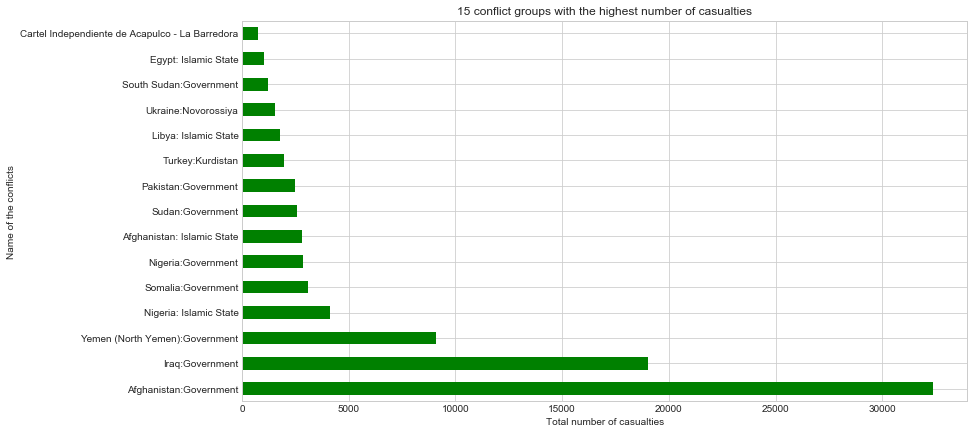

In [129]:
# sort by number of total casualties
grouped_ucdp_casualties = grouped_ucdp_casualties.sort_values(ascending=False)
# then we plot
grouped_ucdp_casualties.head(15).plot(kind='barh', figsize=(13,7), color='green')
plt.title('15 conflict groups with the highest number of casualties')
plt.ylabel('Name of the conflicts')
plt.xlabel('Total number of casualties')
plt.show()

In [127]:
grouped_ucdp_casualties.to_frame().describe()

,Casualties
count,267.000000
mean,398.269663
std,2392.969779
min,0.000000
25%,1.000000
50%,29.000000
75%,105.000000
max,32361.000000


### Number of total casualties

As we just saw there is a great number of conflicts that resulted in a number of casualties equal to 0 or 1. We decided to divide the dataframe into two separate dataframes, one containing the information for the conflicts with 0-1 casualties and a second one for the ones that resulted in 2 or more casualties. We are considering that a conflict that results in more than one casualty would likely correspond to a more violent incident.

We will also look at the casualties for the 40 conflicts that resulted in a highest number of victims.

In [136]:
few_casualties_df = grouped_ucdp_casualties[grouped_ucdp_casualties <= 1]
many_casualties_df = grouped_ucdp_casualties[grouped_ucdp_casualties > 1]

Now we will obtain the main statistics for each subset of data, and plot the boxplot for the named conflicts with a large number of casualties in order to visualize how they are distributed.

In [147]:
few_casualties_df.to_frame().describe()

,Casualties
count,71.000000
mean,0.154930
std,0.364413
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [138]:
many_casualties_df.to_frame().describe()

,Casualties
count,196.000000
mean,542.484694
std,2780.764863
min,2.000000
25%,22.500000
50%,55.500000
75%,172.500000
max,32361.000000


For the boxplot we ommit the outliers with the highest values for a clearer visualization.

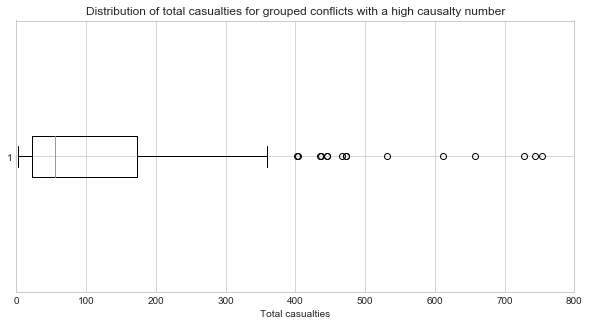

In [150]:
plt.figure(figsize=(10,5))
plt.boxplot(many_casualties_df, vert=False)
plt.xlim([0,800])
plt.xlabel('Total casualties')
plt.title('Distribution of total casualties for grouped conflicts with a high causalty number')
plt.show()

### Conflicts and casualties per type of conflict

We will now consider the ungrouped dataset again, that is, the one including the IDs for each conflict.

There are three different types of conflict in the UCDP dataset:
1. State-Based Violence
2. Non-State Violence
3. One-Sided Violence

We start by grouping the conflicts per type of conflict. We are interested in the number of conflicts as well as in the total number of casualties for each type.

In [176]:
type_labels = ['State-Based Violence (1)',
'Non-State Violence (2)',
'One-Sided Violence (3)']

In [169]:
ucdp_by_type = ucdp_df.groupby('Type')
conflict_count_per_type = ucdp_by_type['Casualties'].count()
casualties_per_type = ucdp_by_type['Casualties'].sum()

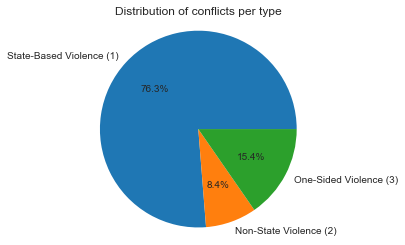

In [177]:
plt.pie(conflict_count_per_type, autopct='%1.1f%%', labels=type_labels)
plt.axis('equal')
plt.title('Distribution of conflicts per type')
plt.show()

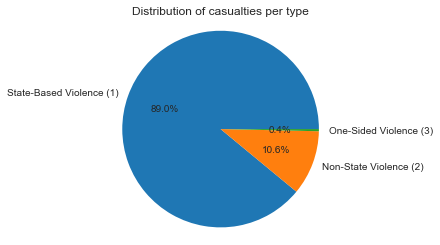

In [178]:
plt.pie(casualties_per_type, autopct='%1.1f%%', labels=type_labels)
plt.axis('equal')
plt.title('Distribution of casualties per type')
plt.show()